In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

############## Import modules ##############
sys.path.append("../../")

%load_ext autoreload
%autoreload 2

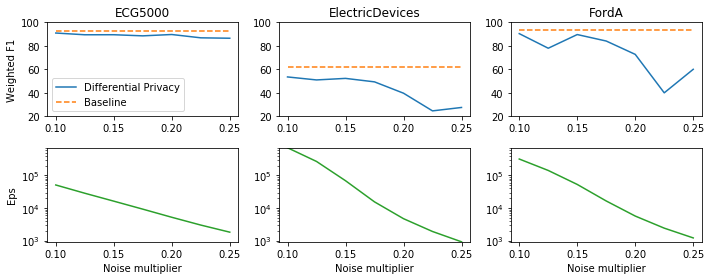

In [7]:
# differntial_detailed
data_dict = {}
data_dict['ECG5000'] = {'baseline': [93.09], 'weighted avg': [90.96, 89.48, 89.51, 88.56, 89.7, 86.88, 86.53], 
    'noise': [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25], 
    'eps': [5.1e+04, 2.85e+04, 1.63e+04, 9.28e+03, 5.23e+03, 3.02e+03, 1.83e+03]}
data_dict['ElectricDevices'] = {'baseline': [61.83], 'weighted avg': [53.61, 51.06, 52.38, 49.42, 39.78, 24.74, 27.64],
    'noise': [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25], 
    'eps': [7.04e+05, 2.68e+05, 6.89e+04, 1.55e+04, 4.74e+03, 1.92e+03, 928]}
data_dict['FordA'] = {'baseline': [93.26], 'weighted avg': [90.45, 78.03, 89.66, 84.15, 72.8, 40.09, 60.11],
    'noise': [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25], 
    'eps': [3.18e+05, 1.42e+05, 5.3e+04, 1.65e+04, 5.7e+03, 2.43e+03, 1.22e+03]}

from matplotlib.lines import Line2D
def plot_differential_detailed(data_dict, save=None):
    fig, axs = plt.subplots(2, len(data_dict), figsize=(10,4))
    
    eps_list = []
    for _, k in enumerate(data_dict):
        eps_list.append(data_dict[k]['eps'])
    eps_list = np.concatenate(eps_list)

    for i, k in enumerate(data_dict):
        axs[0, i].set_title(k)
        axs[0, i].plot(data_dict[k]['noise'], data_dict[k]['weighted avg'])
        axs[0, i].plot(data_dict[k]['noise'], np.repeat(data_dict[k]['baseline'], len(data_dict[k]['noise'])), linestyle='dashed')
        axs[0, i].set_ylim([20, 100])

        axs[1, i].set_yscale('log')
        axs[1, i].set_ylim(np.min(eps_list), np.max(eps_list))
        axs[1, i].plot(data_dict[k]['noise'], data_dict[k]['eps'], color='C2')
        axs[1, i].set_xlabel('Noise multiplier')
    axs[0, 0].set_ylabel('Weighted F1')
    axs[1, 0].set_ylabel('Eps')
     
    legend_elements = [Line2D([0], [0], color='C0', label='Differential Privacy'), Line2D([0], [0], color='C1', linestyle='dashed', label='Baseline')]
    axs[0, 0].legend(handles=legend_elements)
    
    plt.tight_layout()
    if not save is None:
        plt.savefig(save, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()

plot_differential_detailed(data_dict, '../../../results/differential_acc_vs_noise.png')

DP-SGD with sampling rate = 6.4% and noise_multiplier = 0.5 iterated over 1563 steps satisfies differential privacy with eps = 94.3 and delta = 0.002.
The optimal RDP order is 1.25.
The privacy estimate is likely to be improved by expanding the set of orders.
DP-SGD with sampling rate = 3.2% and noise_multiplier = 0.5 iterated over 3125 steps satisfies differential privacy with eps = 71.7 and delta = 0.001.
The optimal RDP order is 1.25.
The privacy estimate is likely to be improved by expanding the set of orders.
DP-SGD with sampling rate = 2.13% and noise_multiplier = 0.5 iterated over 4688 steps satisfies differential privacy with eps = 62.4 and delta = 0.0006666666666666665.
The optimal RDP order is 1.25.
The privacy estimate is likely to be improved by expanding the set of orders.
DP-SGD with sampling rate = 1.6% and noise_multiplier = 0.5 iterated over 6250 steps satisfies differential privacy with eps = 53.6 and delta = 0.0005.
The optimal RDP order is 1.5.
DP-SGD with sampling 

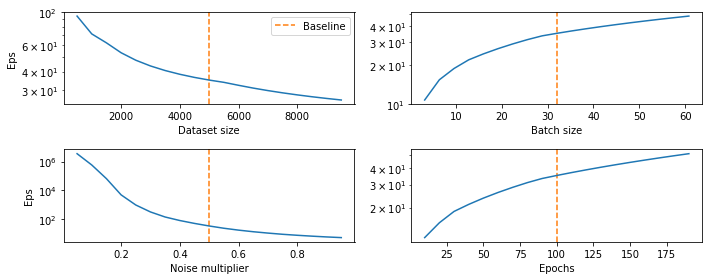

In [4]:
# eps large
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

train_size, epochs, batch_size, noise_multiplier = 5000, 100, 32, 0.5

def plot_eps_eval(train_size, batch_size, noise_multiplier, epochs, save=None):
    fig, axs = plt.subplots(2, 2, figsize=(10,4))
    
    parameter = ['Dataset size', 'Batch size', 'Noise multiplier', 'Epochs']
    for i, a in enumerate(axs.flat):
        p_list = []
        eps_list = []
        for v in np.arange(0.1, 2.0, 0.1):
            p = [train_size, batch_size, noise_multiplier, epochs]
            p[i] *= v
            eps = compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=p[0], batch_size=p[1], noise_multiplier=p[2], 
                epochs=p[3], delta=1/p[0])[0]
            p_list.append(p[i])
            eps_list.append(eps)
            if v == 1:
                a.axvline(p[i], color='C1', linestyle='dashed')
        a.plot(p_list, eps_list)
        a.set_xlabel(parameter[i])
        a.set_yscale('log')
    axs[0, 0].set_ylabel('Eps')
    axs[1, 0].set_ylabel('Eps')
    
    legend_elements = [Line2D([0], [0], color='C1', linestyle='dashed', label='Baseline')]
    axs[0, 0].legend(handles=legend_elements)

    plt.tight_layout()
    if not save is None:
        plt.savefig(save, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()

plot_eps_eval(train_size, batch_size, noise_multiplier, epochs, save='../../../results/differential_parameter_eval.png')